# Orders - Multivariate Regression of  the `review_score`

In [53]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
# Import modules 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import funciones

Utilizar de dataset el resultado de la clase pasada (con la distancia)



In [55]:
orders = pd.read_csv("data/tablon_primario.cv")
orders.head()
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97972 entries, 0 to 97971
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     97972 non-null  int64  
 1   order_id                       97972 non-null  object 
 2   customer_id                    97972 non-null  object 
 3   order_status                   97972 non-null  object 
 4   order_purchase_timestamp       97972 non-null  object 
 5   order_approved_at              97958 non-null  object 
 6   order_delivered_carrier_date   96979 non-null  object 
 7   order_delivered_customer_date  95878 non-null  object 
 8   order_estimated_delivery_date  97972 non-null  object 
 9   tardanza                       95878 non-null  float64
 10  tiempo_de_espera               95878 non-null  float64
 11  tiempo_de_espera_esperado      97972 non-null  float64
 12  real_vs_esperado               95878 non-null 

Let's recall our simple analysis from yesterday's exercise: 

¿ Aqué esta correlacionada `review_score`?
 * Si dos variables tmb tienen correlación entre sí deberíamos analizarla por separado
  *  Probar con `statsmodels`: `tiempo_de_espera` y `real_vs_esperado`

C:\Users\josik\AppData\Local\Temp\ipykernel_13828\2305605852.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  orders.corr(),


<Axes: >

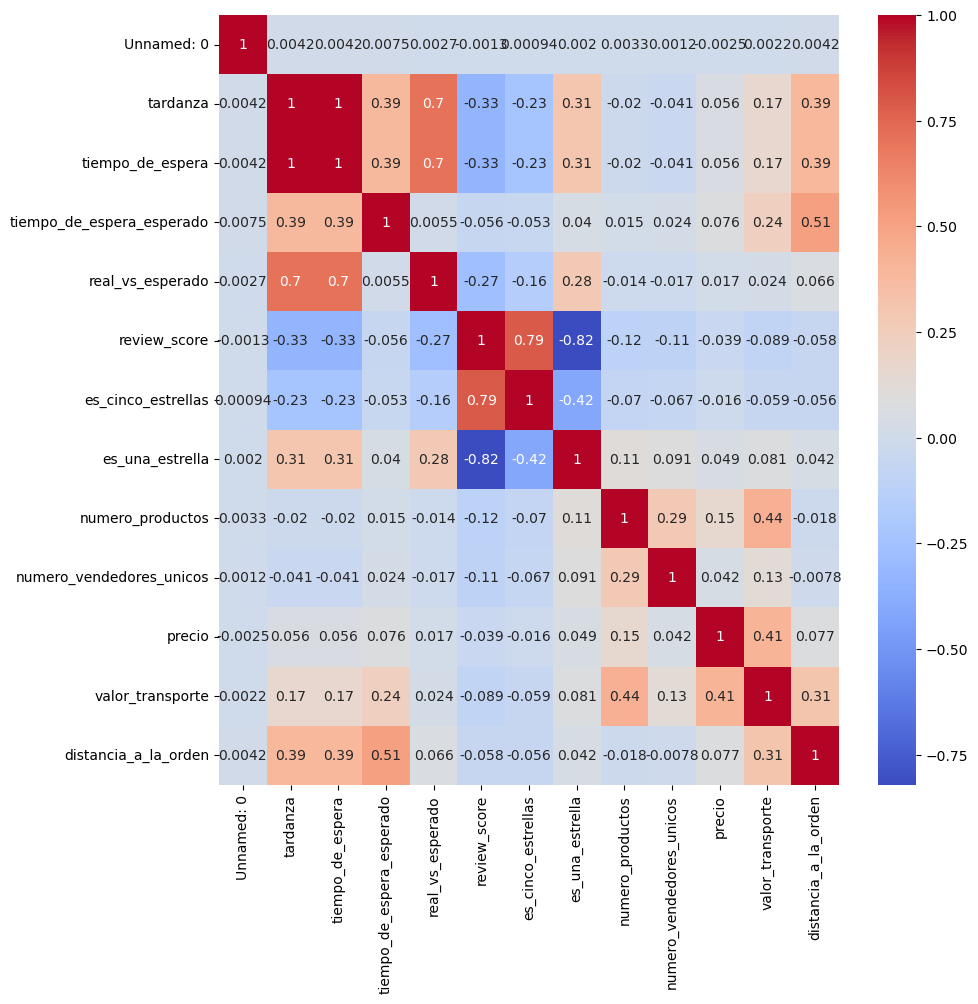

In [56]:
plt.figure(figsize = (10, 10))

sns.heatmap(
    orders.corr(), 
    cmap = 'coolwarm', 
    annot = True, 
    annot_kws = {"size": 10}
)

## 1 - Regresión Univariada

Usar [statsmodels](https://www.statsmodels.org/stable/generated/statsmodels.formula.api.ols.html) con `statsmodels.formula.api`
 - `model1`: una regresión ols de `review_score` sobre `tiempo_de_espera`
 - `model2`: una regresión ols de `review_score` sobre `real_vs_esperado`

Para cada uno, imprima la tabla `summary` e interprete los resultados:
- Entender cómo estos resultados coinciden con los del diagrama de seaborn
- Interpretar `R-squared`, así como `coeficientes de regresión individuales`, `valores t`, `valores p` e `intervalos de confianza del 95 %`

***Modelo 1***:

In [57]:
import statsmodels.formula.api as smf

modelo1 = smf.ols('review_score ~ tiempo_de_espera', data = orders)
modelo1 = modelo1.fit()
modelo1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                 1.205e+04
Date:                Wed, 01 Nov 2023   Prob (F-statistic):               0.00
Time:                        00:49:16   Log-Likelihood:            -1.5443e+05
No. Observations:               95878   AIC:                         3.089e+05
Df Residuals:                   95876   BIC:                         3.089e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.7236      0.006    727.867      0.000       4.711       4.736
tiempo_de_espera    -0.0454      0.000   -109.750      0.000      -0.046      -0.045
==============================================================================
Omnibus:                    19549.037   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35441.614
Skew:                          -1.300   Prob(JB):                         0.00
Kurtosis:                       4.453   Cond. No.                         26.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#El modelo sería Y = 4.72 - 0.045x (siendo Y= review score y X= Tiempo de espera)
#El r cuadrado es 0.112, esto es bajísimo, se suelen buscar r cuadrados (dependiendo de las variables) cercanos a 0.9
#Esto se relaciona con el seaborn porque ahí vemos que la correlación entre estas dos variables es de -0.3.
#Que sea baja la correlación implica que un cambio en tiempo de espera no debería afectar el review y al ser negativa, a mas tiempo de espera, menor review (eso coincide en la correlación, en el modelo y en la lógica esperada)
#El p-value asociado al t-value es menor a 0.05, lo cual lo hace significativo
#El intervalo de confianza coincide con los coeficientes obtenidos, ya que los dos están dentro. Esto le agrega confianza la modelo


***Modelo 2***:

In [58]:
modelo2 = smf.ols('review_score ~ real_vs_esperado', data = orders)
modelo2 = modelo2.fit()
modelo2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     7680.
Date:                Wed, 01 Nov 2023   Prob (F-statistic):               0.00
Time:                        00:49:43   Log-Likelihood:            -1.5641e+05
No. Observations:               95878   AIC:                         3.128e+05
Df Residuals:                   95876   BIC:                         3.128e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.2120      0.004   1041.073      0.000       4.204       4.220
real_vs_esperado    -0.0752      0.001    -87.634      0.000      -0.077      -0.073
==============================================================================
Omnibus:                    20659.380   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49737.108
Skew:                          -1.203   Prob(JB):                         0.00
Kurtosis:                       5.580   Cond. No.                         4.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#En este caso las conclusiones son muy parecidas, casi similares al modelo anterior

## 2 - Multivariate regression

***responder***
¿Cual es el impacto en `review_score` agregando un día más de `real_vs_esperado` manteniendo todo lo otro constante? ¿Cuál es más explicativa de `review_score`,`tiempo_de_espera` o `real_vs_esperado` ?



In [59]:
modelo3 = smf.ols('review_score ~ tiempo_de_espera + real_vs_esperado', data = orders)
modelo3 = modelo3.fit()
modelo3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     6193.
Date:                Wed, 01 Nov 2023   Prob (F-statistic):               0.00
Time:                        00:49:45   Log-Likelihood:            -1.5428e+05
No. Observations:               95878   AIC:                         3.086e+05
Df Residuals:                   95875   BIC:                         3.086e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.6503      0.008    601.571      0.000       4.635       4.665
tiempo_de_espera    -0.0383      0.001    -66.006      0.000      -0.039      -0.037
real_vs_esperado    -0.0205      0.001    -17.389      0.000      -0.023      -0.018
==============================================================================
Omnibus:                    19991.291   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            40487.557
Skew:                          -1.249   Prob(JB):                         0.00
Kurtosis:                       4.974   Cond. No.                         31.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Tiempo de espera es más explicativa porque el valor absoluto del coeficiente es mayor al de real_vs_esperado y aademás el t-value es mayor
#Ambas variables están dentro del intervalo de confianza y tienen un P-value significativo, sin embargo, el R2 del modelo sigue siendo muy bajo

 R-squared es bastante bajo: no más del 12 % de las variaciones de review_score se explican por las variaciones combinadas de `tiempo_de_espera` y `real_vs_esperado`.

Intentemos agregar más variables a nuestra regresión para mejorar la explicabilidad de la regresión lineal.

Crear un nuevo OLS `model4` con más características del conjunto de datos `orders`.
- No agregar dos características perfectamente colineales entre sí
-  Transformar cada variables $X_i$ con el respectivo z-score $Z_i = \frac{X_i - \mu_i}{\sigma_i}$  para comparar los coeficientes de regresión parcial $\beta_i$ en conjuntos.  $\beta_i$ no estará en la misma dimensión.

***Modelo 4***:

¿Que variables considerar?

In [60]:
orders.columns

Index(['Unnamed: 0', 'order_id', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'tardanza', 'tiempo_de_espera',
       'tiempo_de_espera_esperado', 'real_vs_esperado', 'review_score',
       'es_cinco_estrellas', 'es_una_estrella', 'numero_productos',
       'numero_vendedores_unicos', 'precio', 'valor_transporte',
       'distancia_a_la_orden'],
      dtype='object')

In [61]:
features = ['real_vs_esperado', 'numero_productos', 'numero_vendedores_unicos', 'precio', 'valor_transporte', 'distancia_a_la_orden' ]

Crear el `modelo4`

In [63]:
formula = "review_score ~ " + ' + '.join(features)
formula

'review_score ~ real_vs_esperado + numero_productos + numero_vendedores_unicos + precio + valor_transporte + distancia_a_la_orden'

In [64]:
modelo4 = smf.ols(formula, data = orders)
modelo4 = modelo4.fit()
modelo4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     1782.
Date:                Wed, 01 Nov 2023   Prob (F-statistic):               0.00
Time:                        00:49:54   Log-Likelihood:            -1.5504e+05
No. Observations:               95878   AIC:                         3.101e+05
Df Residuals:                   95871   BIC:                         3.102e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    5.5176      0.033    167.741      0.000       5.453       5.582
real_vs_esperado            -0.0751      0.001    -88.651      0.000      -0.077      -0.073
numero_productos            -0.2225      0.009    -25.875      0.000      -0.239      -0.206
numero_vendedores_unicos    -0.9636      0.033    -28.965      0.000      -1.029      -0.898
precio                   -8.573e-06   2.08e-05     -0.411      0.681   -4.94e-05    3.23e-05
valor_transporte            -0.0011      0.000     -4.566      0.000      -0.002      -0.001
distancia_a_la_orden     -8.132e-05   7.12e-06    -11.426      0.000   -9.53e-05   -6.74e-05
==============================================================================
Omnibus:                    19835.648   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            50069.908
Skew:                          -1.139   Prob(JB):                         0.00
Kurtosis:                       5.711   Cond. No.                     1.00e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

---
- ¿Cuáles son las características más importantes? (hacer un gráfico de barras para visualizarlos bien)
- ¿Cómo ha cambiado el rendimiento general de la regresión?
- ¿Es esta regresión estadísticamente significativa?

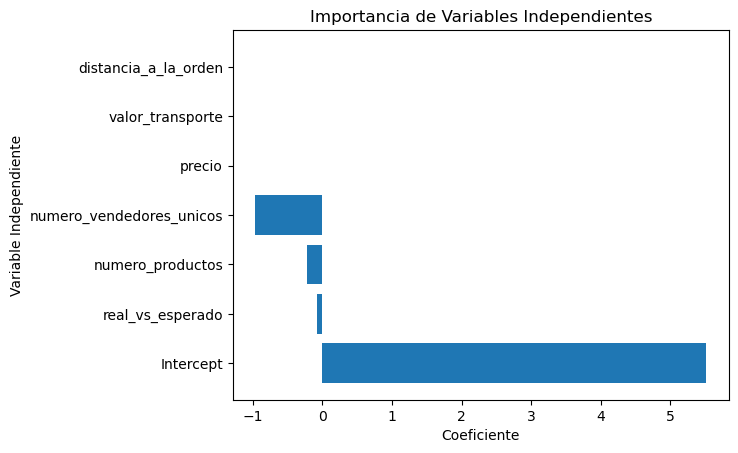

In [65]:
coeficientes = modelo4.params
variables = ['Intercept','real_vs_esperado', 'numero_productos', 'numero_vendedores_unicos', 'precio', 'valor_transporte', 'distancia_a_la_orden']
plt.barh(variables, coeficientes)
plt.xlabel('Coeficiente')
plt.ylabel('Variable Independiente')
plt.title('Importancia de Variables Independientes')
plt.show()

In [ ]:
#El coeficiente más importante para ser la cantidad de vendedores únicos por orden. Es el coeficiente más alto en valores absolutos (0.96)
#En términos estadísticos, la regresión sigue siendo bastante similar a las anteriores. Mirando los parámetros y coeficientes es estadísticamente significativa (Pvalues bajo, coef dentro de intervalo de confianza, t values acordes)
#Pero el R2 del modelo sigue siendo muy bajo, por lo que significa que estas variables explican muy poco las variaciones en el score del review


- ¿Cual es la variable que más impacto tiene?
- qué pasa con productos y vendedores cuando hay más?
- Que pasa con la distancia?
- Que pasa con precio y transporte?
    
- Qué pasa con F-statistics y p-value?

- Analizar R cuadrado

Un R cuadrado bajo es común cuando el número de observaciones (n) es mucho mayor que el número de características (p). Todavía se pueden derivar ideas relevantes de tales regresiones, siempre que sean estadísticamente significativas.





In [ ]:
#El coeficiente más importante para ser la cantidad de vendedores únicos por orden. Es el coeficiente más alto en valores absolutos (0.96)
#Parece que mientras más vendedores haya y más productos, peor va a ser el review. Manteniendo el resto de las variables constantes, por cada punto que agregar de vendedores, la review va a caer un 96%
#La distancia, el precio y el valor del transporte tienen coeficientes muy bajo, por ende, interpreto que no son significativos a la hora de analizar cambios en el review score.
#En términos estadísticos, la regresión sigue siendo bastante similar a las anteriores. Mirando los parámetros y coeficientes es estadísticamente significativa (Pvalues bajo, coef dentro de intervalo de confianza, t values acordes)
#Pero el R2 del modelo sigue siendo muy bajo, por lo que significa que estas variables explican muy poco las variaciones en el score del review

## 3 - Chequear la performance de modelos

¡El rendimiento de la regresión no debe medirse solo por su R-cuadrado!

Siempre visualice la distribución de las predicciones, y especialmente los residuales.

* Calcular los residuos.

Debería ver que la media de los residuos es igual a 0 (siempre verificado en un contexto de regresión lineal)

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
orders = orders.dropna()

X = orders[features]  
y = orders['review_score']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Ahora 'y_test' contiene los valores reales y 'y_pred' contiene las predicciones del modelo.


In [71]:
residuos = y_test - y_pred
residuos.mean()

0.010652027472225179

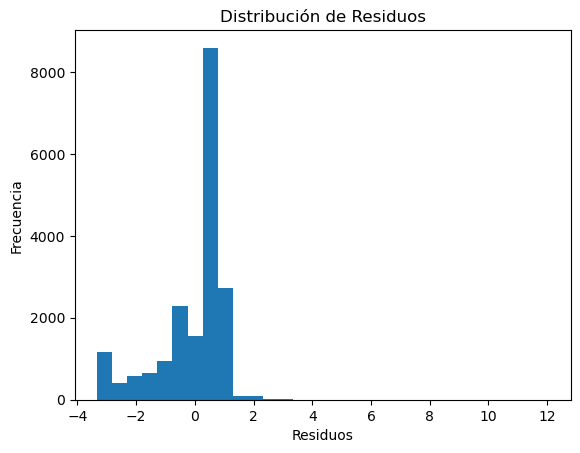

In [69]:
plt.hist(residuos, bins=30)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Distribución de Residuos')
plt.show()

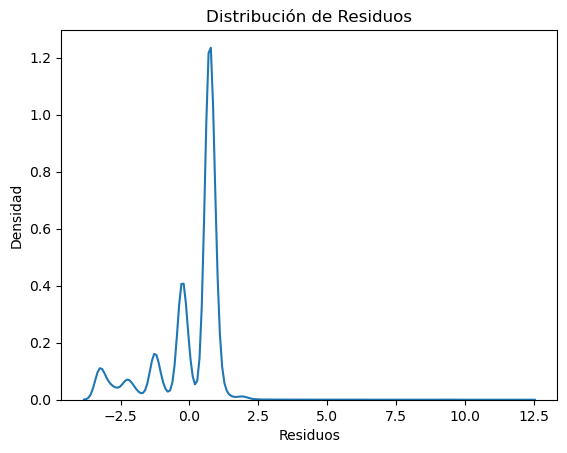

In [70]:
sns.kdeplot(residuos)
plt.xlabel('Residuos')
plt.ylabel('Densidad')
plt.title('Distribución de Residuos')
plt.show()

Computar rmse

In [74]:
##codear RMS (Buscar en wikipedia)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)
rmse

1.2138225502365645

Plotear los resultados

* ¿Por qué la trama residual tiene una forma tan extraña?

Plotea en el mismo gráfico tanto la distribución de `review_score` como la distribución de `predicted_review_score`.

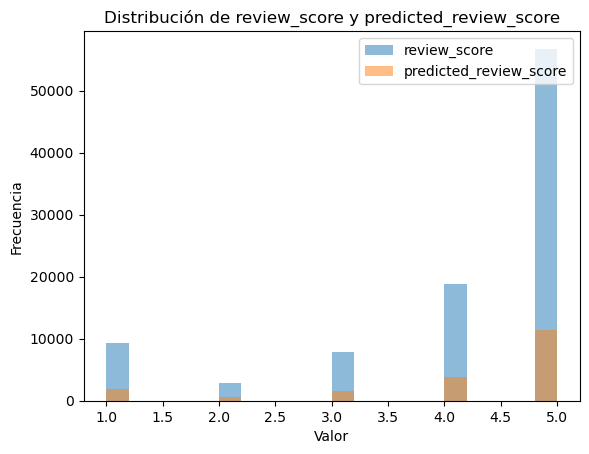

In [79]:
plt.hist(orders['review_score'], alpha=0.5, label='review_score', bins=20)
plt.hist(y_test, alpha=0.5, label='predicted_review_score', bins=20)
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend(loc='upper right')
plt.title('Distribución de review_score y predicted_review_score')
plt.show()

C:\Users\josik\AppData\Local\Temp\ipykernel_13828\1525950951.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(orders['review_score'], label='review_score', shade=True)
C:\Users\josik\AppData\Local\Temp\ipykernel_13828\1525950951.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test, label='predicted_review_score', shade=True)


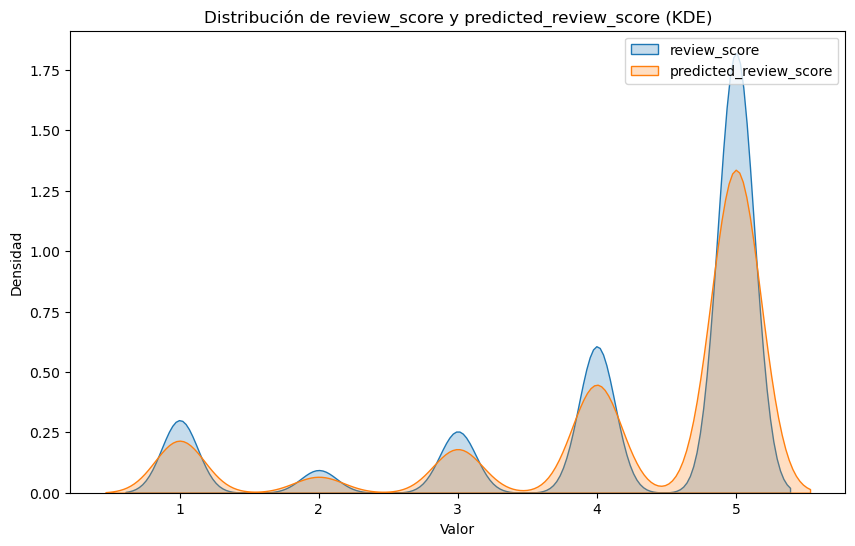

In [82]:
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura si es necesario
sns.kdeplot(orders['review_score'], label='review_score', shade=True)
sns.kdeplot(y_test, label='predicted_review_score', shade=True)
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.legend()
plt.title('Distribución de review_score y predicted_review_score (KDE)')
plt.show()

Usando `seaborn`, ya podríamos haber trazado una `línea de regresión` de `review_score` frente a `real_vs_esperado`

Hacelo con una sub-`muestra` de la población, y una vez con la `toda la población`.

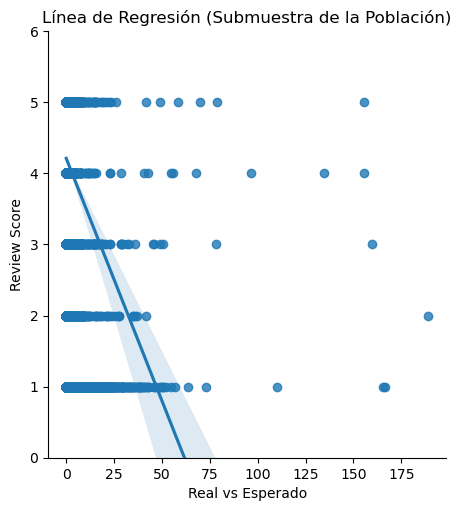

In [86]:
submuestra = orders.sample(frac=0.2)
sns.lmplot(x='real_vs_esperado', y='review_score', data=submuestra)
plt.xlabel('Real vs Esperado')
plt.ylabel('Review Score')
plt.ylim(0, 6) 
plt.title('Línea de Regresión (Submuestra de la Población)')
plt.show()

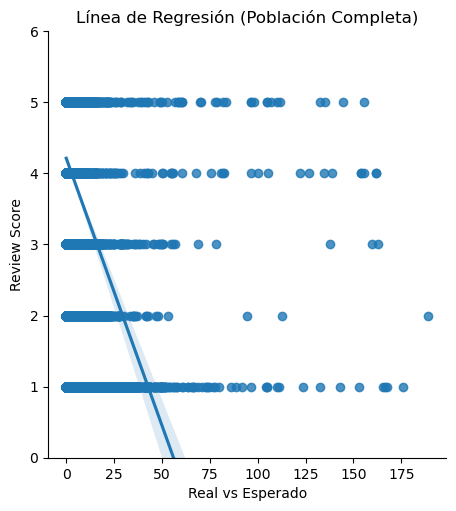

In [87]:
sns.lmplot(x='real_vs_esperado', y='review_score', data=orders)
plt.xlabel('Real vs Esperado')
plt.ylabel('Review Score')
plt.ylim(0, 6) 
plt.title('Línea de Regresión (Población Completa)')
plt.show()